In [22]:
def librerias():
    '''Importación de librerias necesarias para regreseín lineal'''
    
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt


print(librerias.__doc__)

Importación de librerias necesarias para regreseín lineal


In [23]:
def lecturadb():
    '''Lectura de la base de datos diabetes'''
pima = pd.read_csv("DatasetDiabetes.csv")
print(lecturadb.__doc__)
pima.head()

Lectura de la base de datos diabetes


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [24]:
def limpiezadb():
    '''
        Limpieza de la base de datos
        
        Gender:
            F = 1
            M = 0
        CLASS:
            N = 0
            Y = 1
            P = 2
    '''
pima['Gender'] = pima['Gender'].map({'F': 1, 'M': 0})
pima['CLASS'] = pima['CLASS'].map({'N': 0, 'P': 2,'Y':1})
print(limpiezadb.__doc__)
pima.head()


        Limpieza de la base de datos
        
        Gender:
            F = 1
            M = 0
        CLASS:
            N = 0
            Y = 1
            P = 2
    


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
1,735,34221,0.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0.0
2,420,47975,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
3,680,87656,1.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0.0
4,504,34223,0.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0.0


In [25]:
pima = pima.fillna(0)
def fillasNA():
    '''Determinar el target o variable dependiente y tambien las caracteristicas o variables independientes '''

pima = pima.fillna(0)

print(fillasNA.__doc__)

Determinar el target o variable dependiente y tambien las caracteristicas o variables independientes 


In [26]:
def defCaracteristicasXyY():
    '''Determinar el target o variable dependiente y tambien las caracteristicas o variables independientes '''

feature_cols = ['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
X = pima[feature_cols] 
y = pima.CLASS 

print(defCaracteristicasXyY.__doc__)

Determinar el target o variable dependiente y tambien las caracteristicas o variables independientes 


In [27]:
def division():
    '''División del conjunto de dato en relación al conjunto de entrenamiento y prueba'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(division.__doc__)

División del conjunto de dato en relación al conjunto de entrenamiento y prueba


In [29]:
def objetoclasificador():
    '''Creación del objeto clasificador del arbol de decisión'''
clf = DecisionTreeClassifier()
print(objetoclasificador.__doc__)

Creación del objeto clasificador del arbol de decisión


In [31]:
def entrenarclasificador():
    '''Entrenar el clasificador del árbol de decisión'''
clf = clf.fit(X_train,y_train)
print(entrenarclasificador.__doc__)

Entrenar el clasificador del árbol de decisión


In [32]:
def prediccion():
    '''Predicción de la respuesta para el conjunto de datos de prueba'''
y_pred = clf.predict(X_test)
print(prediccion.__doc__)

Predicción de la respuesta para el conjunto de datos de prueba


# Visualización del arbol 

Visualización del arbol completo


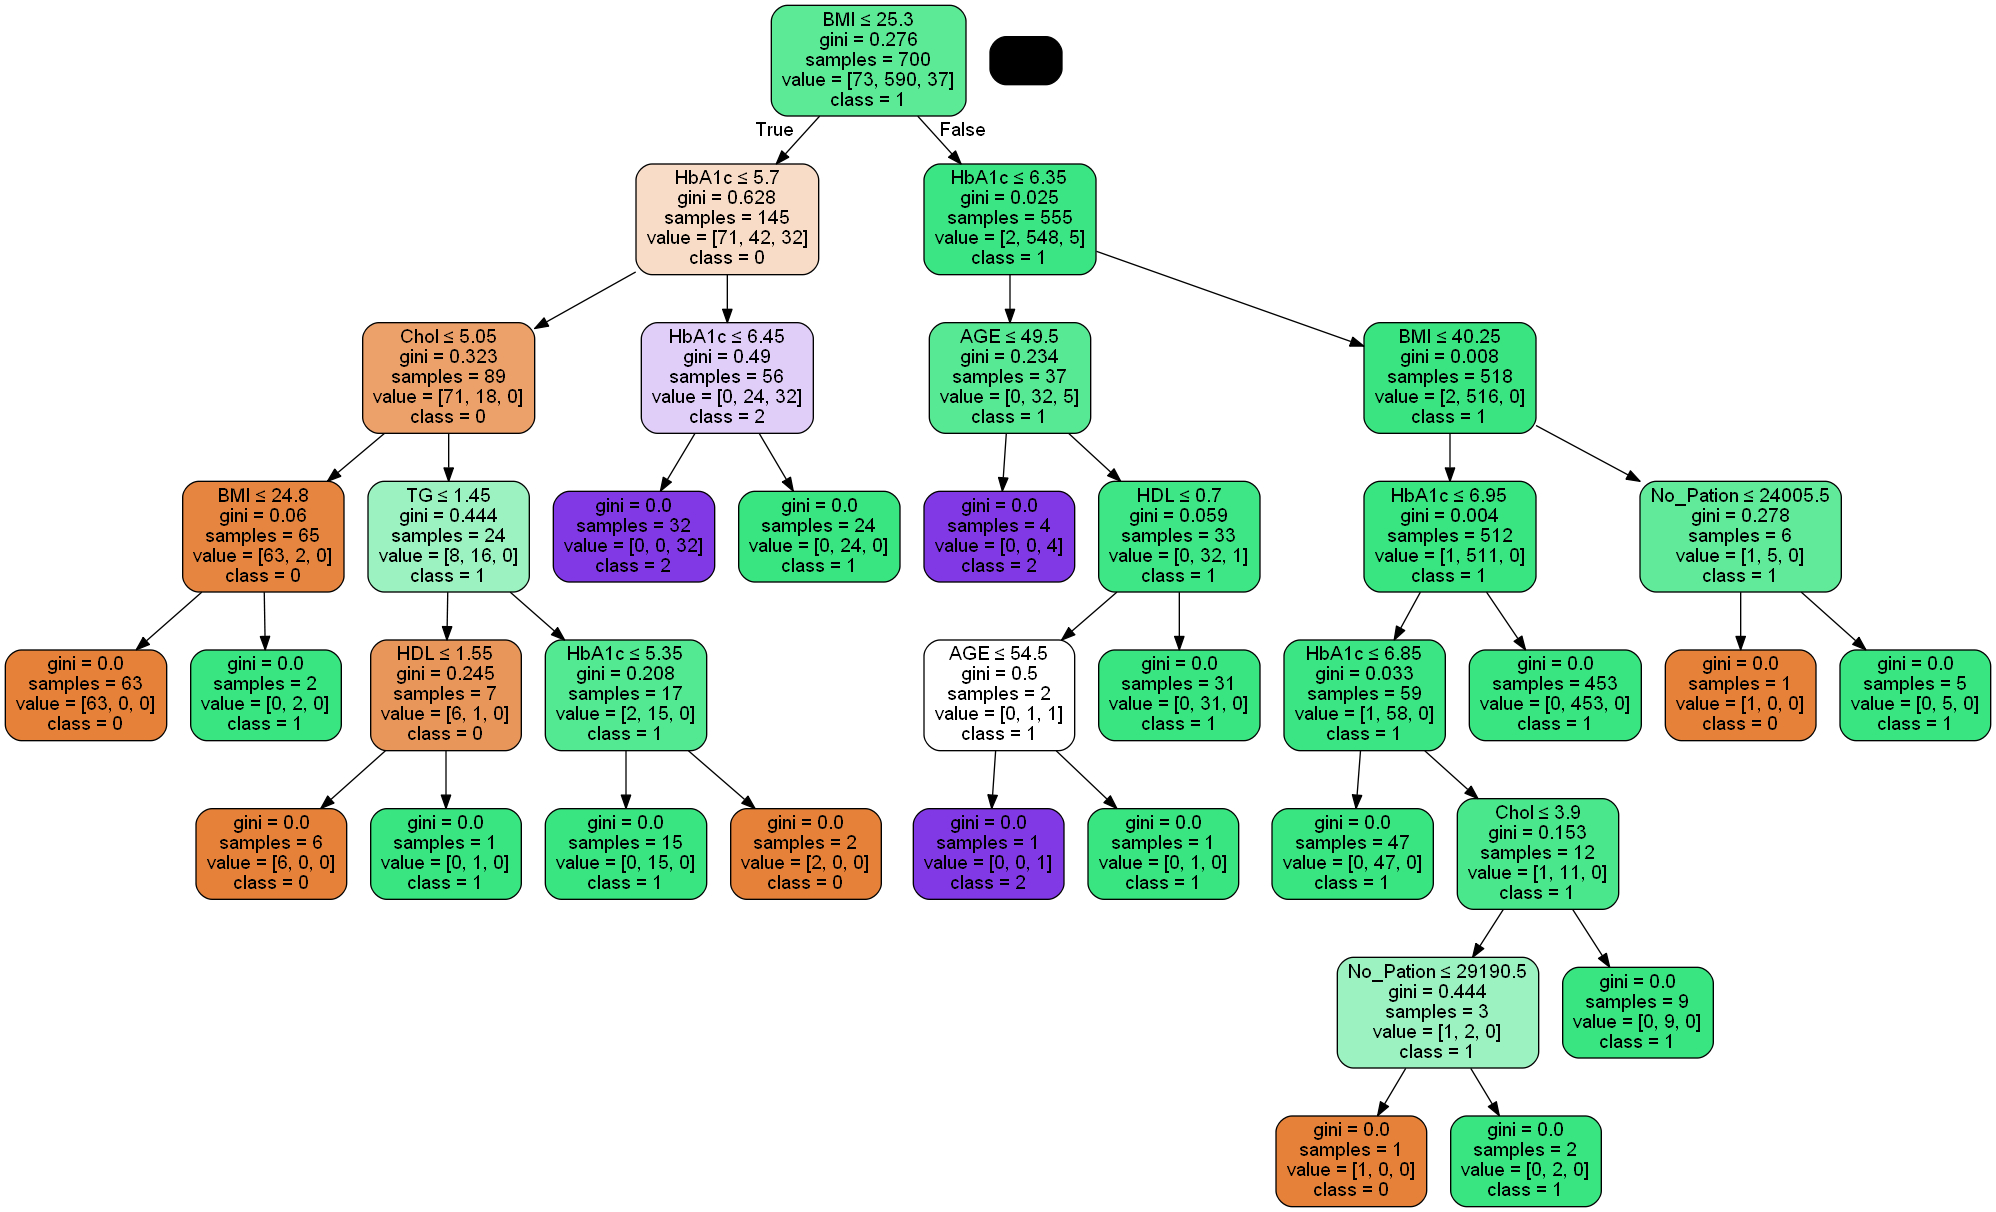

In [33]:
def VerArbol1():
    '''Visualización del arbol completo'''
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Arboldiabetes.png')

print(VerArbol1.__doc__)

Image(graph.create_png())


# Pruning

In [39]:
def objetoclasificadorP():
    '''Creación del objeto clasificador del arbol de decisión podado '''
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
print(objetoclasificadorP.__doc__)


Creación del objeto clasificador del arbol de decisión podado 


In [40]:
def entrenarclasificadorP():
    '''Entrenar el clasificador del árbol de decisión podado'''
clf = clf.fit(X_train,y_train)
print(entrenarclasificadorP.__doc__)

Entrenar el clasificador del árbol de decisión podado
